In [1]:
import pandas as pd
test_df = pd.read_csv('/home/workspace/data/GLDv2/test/test.csv')
recognition_df = pd.read_csv('/home/workspace/data/GLDv2/test/recognition_solution_v2.1.csv')
retrieval_df = pd.read_csv('/home/workspace/data/GLDv2/test/retrieval_solution_v2.1.csv')

In [5]:
# GLDv2 데이터셋의 테스트 이미지는 117,577개 존재
test_df.head()

id
0  00016575233bc956
1  0001aadbcd8cb923
2  0002c06b2440a5f9
3  0002eb1ee5a5a6b2
4  000594dad986513e

# recognition_solution_v2.1.csv 파일
- 위 파일의 landmark는 train 데이터의 landmark와 동일

In [7]:
recognition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117577 entries, 0 to 117576
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         117577 non-null  object
 1   landmarks  1972 non-null    object
 2   Usage      117577 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [8]:
recognition_df.head()

id landmarks    Usage
0  e324e0f3e6d9e504       NaN  Private
1  d9e17c5f3e0c47b3       NaN  Private
2  1a748a755ed67512       NaN   Public
3  537bf9bdfccdafea       NaN  Private
4  13f4c974274ee08b       NaN  Private

In [ ]:
# index 데이터의 랜드마크 종류는 849개(NaN 제외)
len(recognition_df['landmarks'].unique())

850

In [12]:
recognition_df['Usage'].unique()

array(['Private', 'Public'], dtype=object)

## 랜드마크 아이디로 index의 이미지 확인하기

In [26]:
recognition_df.dropna(inplace=True)
landmark_list = recognition_df['landmarks'].unique()

In [27]:
landmark_list

array(['179171', '124703', '150977', '92607', '184268', '59637',
       '114046 171629', '129293 40111', '182735', '118979 17049',
       '190638', '74275', '78530', '54714', '181954 44829', '123095',
       '129069', '58151', '164395', '164862', '121045', '97343', '116512',
       '132345 99920', '101170', '187645 4465', '132969 16275', '193942',
       '4072', '10936', '170235', '126370', '192223', '128628', '169083',
       '69490', '3092', '181291 56627', '185558 94824', '193772', '40981',
       '127894', '105024', '13975', '123095 31480 4465', '144164',
       '191475', '28604', '17960', '191475 199949', '75799', '107743',
       '180346', '51875', '135353 35639', '165596', '169217', '34453',
       '142296 150996', '121008', '154347', '144991 83181', '45936',
       '2247', '19136 3705', '61105', '11890', '37134', '11755', '169757',
       '143354', '3232', '17564', '78038', '74955', '166831', '129857',
       '157747', '112536 2247 40086', '100782 155821', '110477', '35910',
  

In [62]:
list(recognition_df[recognition_df['landmarks'] == '16892']['id'])

['8128b0a81ed2b876']

### test 이미지

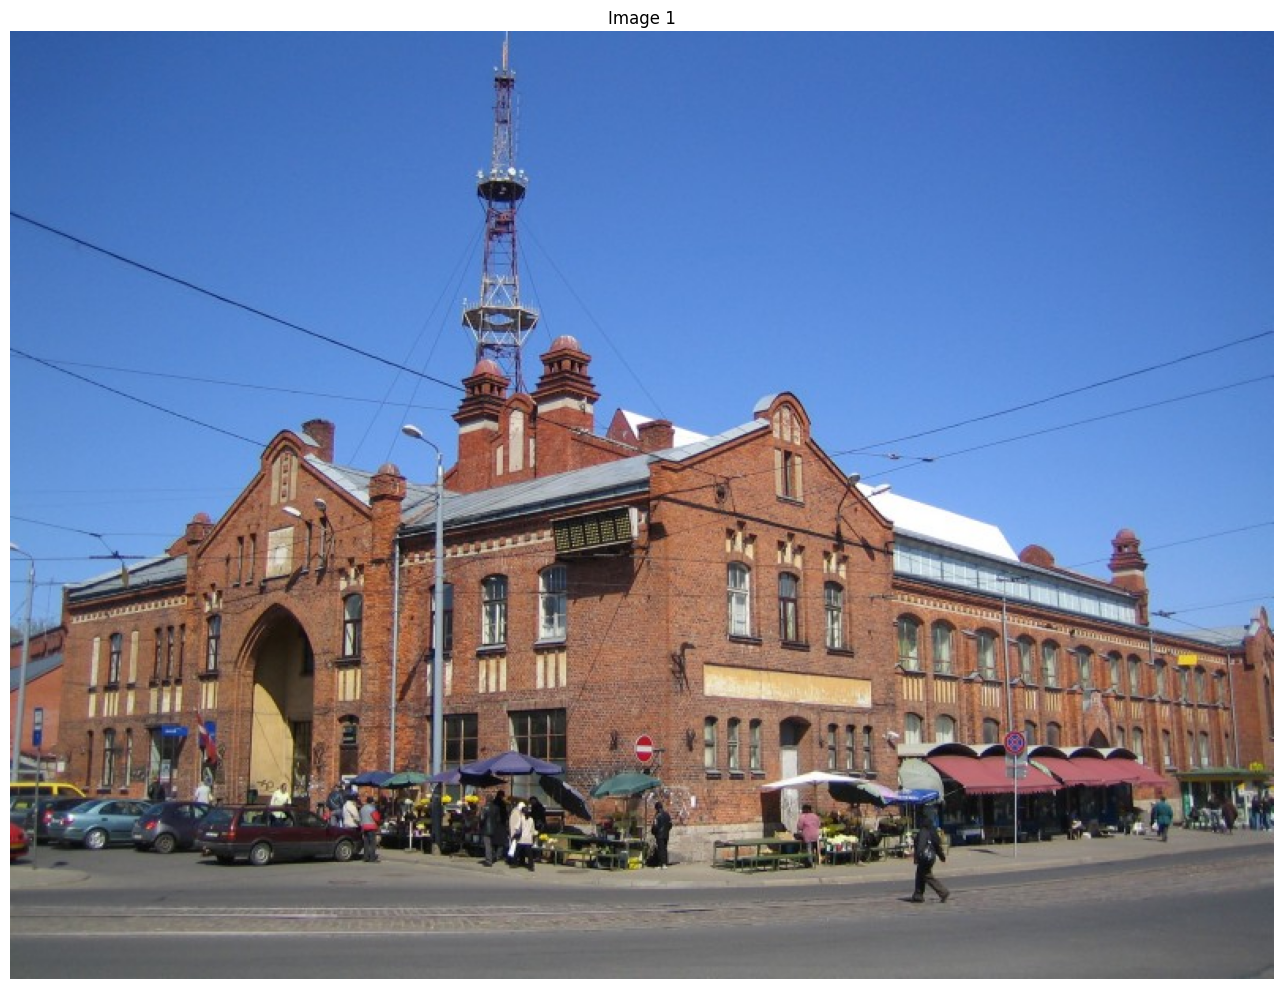

In [75]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
global_path = '/home/workspace/data/GLDv2/test/image'
# 이미지 파일 경로 리스트
image_paths = list(recognition_df[recognition_df['landmarks'] == '16892']['id'])

# 서브플롯 생성
plt.figure(figsize=(15, 10))
for i, image_path in enumerate(image_paths):
    image_path = image_path[0] + '/' + image_path[1] + '/' + image_path[2] + '/' + image_path + '.jpg'
    path = os.path.join(global_path, image_path)
    img = mpimg.imread(path)
    plt.subplot(1, len(image_paths), i + 1)  # 1행 5열의 서브플롯
    plt.imshow(img)
    plt.axis('off')  # 축 숨기기
    plt.title(f'Image {i + 1}', fontsize=12)

plt.tight_layout()
plt.show()

### train 이미지

In [71]:
train_landmark_df = pd.read_csv('/home/workspace/data/GLDv2/train/train.csv')

In [73]:
train_landmark_df[train_landmark_df['landmark_id'] == 16892]

id                                                url  \
355571   bfa040d7a54c7efd  https://upload.wikimedia.org/wikipedia/commons...   
1323835  1a2478df4adfd606  https://upload.wikimedia.org/wikipedia/commons...   
1357485  f0bc00b3ecb9be82  https://upload.wikimedia.org/wikipedia/commons...   
3262464  02a9c0e4059b4020  https://upload.wikimedia.org/wikipedia/commons...   
3502136  2f7cfbc7c859b003  https://upload.wikimedia.org/wikipedia/commons...   
3830964  1f75af27ae6cb405  https://upload.wikimedia.org/wikipedia/commons...   
3911126  2b7aafbc6d21c32a  https://upload.wikimedia.org/wikipedia/commons...   

         landmark_id  
355571         16892  
1323835        16892  
1357485        16892  
3262464        16892  
3502136        16892  
3830964        16892  
3911126        16892

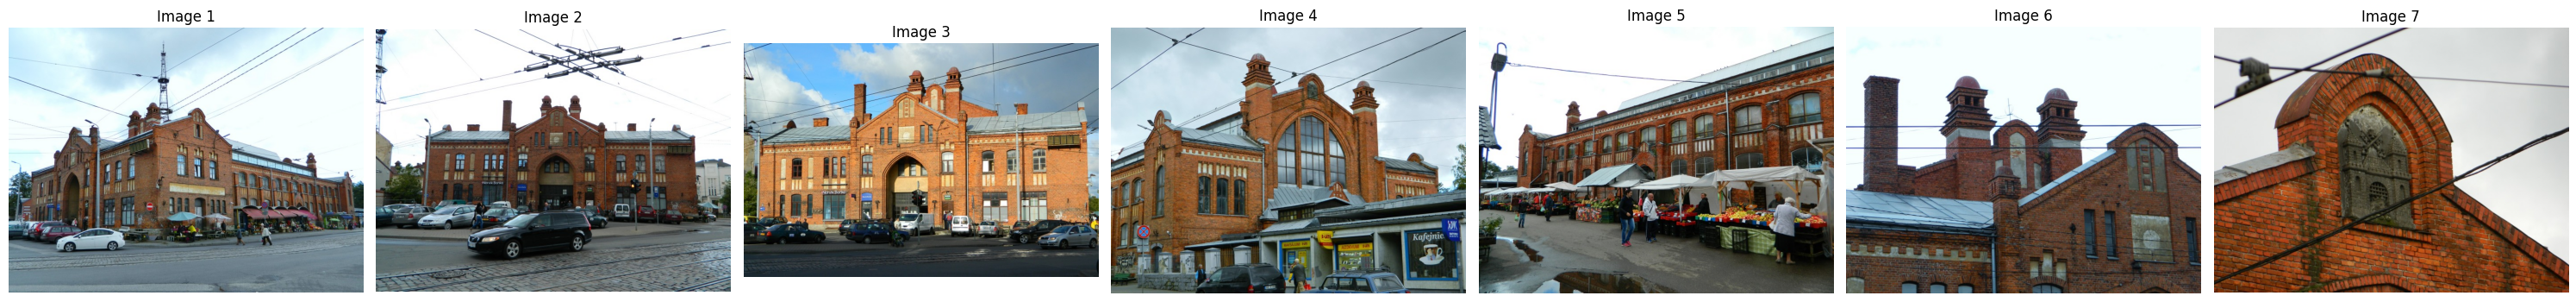

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
global_path = '/home/workspace/data/GLDv2/train/image'
# 이미지 파일 경로 리스트
image_paths = list(train_landmark_df[train_landmark_df['landmark_id'] == 16892]['id'])

# 서브플롯 생성
plt.figure(figsize=(30, 20))
for i, image_path in enumerate(image_paths):
    image_path = image_path[0] + '/' + image_path[1] + '/' + image_path[2] + '/' + image_path + '.jpg'
    path = os.path.join(global_path, image_path)
    img = mpimg.imread(path)
    plt.subplot(1, len(image_paths), i + 1)  # 1행 5열의 서브플롯
    plt.imshow(img)
    plt.axis('off')  # 축 숨기기
    plt.title(f'Image {i + 1}', fontsize=12)

plt.tight_layout()
plt.show()

# retrieval_solution_v2.1.csv 파일
- 이 파일의 images 열은 index 이미지

In [11]:
retrieval_df.head()

id images    Usage
0  a1788046694b0213    NaN  Ignored
1  c0b46342f2ccd446    NaN  Ignored
2  d6058caf9827c742    NaN  Ignored
3  7a303b25b701c535    NaN  Ignored
4  938d53db837e3113    NaN  Ignored

In [16]:
retrieval_df.groupby('id')['images'].count().sort_values(ascending=False)

id
2dd0ce2f451c3c59    1
325fa94b54b482c2    1
6245135a4874c62e    1
36051cd89ec9ff65    1
13832898cde5741f    1
                   ..
5562d54c0e25291a    0
5562b4fa7b1abb24    0
5561f449587e95a8    0
5561ebe6448aefc1    0
55692766d471a888    0
Name: images, Length: 117577, dtype: int64

In [22]:
retrieval_df[retrieval_df['images'].notna()]

id                                             images  \
20      9265ec6df51a366e  13b75d49867d477d 39cfce5ff10cb8f6 47a85cbcf849...   
74      67e40359b5e315cc  0abcae3d89059199 0f76cdc8baa4d8c3 156c8606cafa...   
279     58b7fad17f7d0cf5  3302f54d4a85173a 4995a5b67235ae47 5ad6bdf31ae5...   
364     f176e0fe5888f2d4  141125628b4ae151 307cdfaf4a2c85b9 3a00c1b715f3...   
1103    8d13fa3a2ed54167                                   fc116d940ebbd83b   
...                  ...                                                ...   
117371  e57bd722f4e7bc54  06d975ebbc55a5bd 0a77d60a70f269b4 0cfa45c5d156...   
117416  5551c2a604e9f9b5  105a4cc88fdee0eb 1290ff0b7d9d02cc 163036f92df6...   
117426  9bc57c3a8848628d                                   0d1e8805158b5b74   
117514  1e1409a3a161413d  00b73fe87acaea5f 08f7111488547a70 0a37a5c07d28...   
117557  3100ffe8273aad77  018c052db862ca81 0eecdb06234899e6 0f838afa7e5f...   

          Usage  
20       Public  
74      Private  
279      Public  
364     Private  
1103    Private  
...         ...  
117371  Private  
117416  Private  
117426   Public  
117514   Public  
117557  Private  

[1129 rows x 3 columns]

In [27]:
retrieval_custom_df = (
    retrieval_df
    .assign(images=retrieval_df["images"].str.split())   # ['3b75d4…', '39cfce…', …]
    .explode("images")                        # 각 파일명이 독립 행으로
    .reset_index(drop=True)
)


In [28]:
retrieval_custom_df

id images    Usage
0       a1788046694b0213    NaN  Ignored
1       c0b46342f2ccd446    NaN  Ignored
2       d6058caf9827c742    NaN  Ignored
3       7a303b25b701c535    NaN  Ignored
4       938d53db837e3113    NaN  Ignored
...                  ...    ...      ...
131581  5cf2b107215f6422    NaN  Ignored
131582  47ffd1eb787f0751    NaN  Ignored
131583  a960115b6648c6c8    NaN  Ignored
131584  63ddeea9ac4bb681    NaN  Ignored
131585  718d48427fca2e71    NaN  Ignored

[131586 rows x 3 columns]

In [29]:
retrieval_custom_df[retrieval_custom_df['images'].notna()]

id            images    Usage
20      9265ec6df51a366e  13b75d49867d477d   Public
21      9265ec6df51a366e  39cfce5ff10cb8f6   Public
22      9265ec6df51a366e  47a85cbcf8498050   Public
23      9265ec6df51a366e  4ec41677d8c53e8d   Public
24      9265ec6df51a366e  86a9a6e34db800a5   Public
...                  ...               ...      ...
131562  3100ffe8273aad77  0eecdb06234899e6  Private
131563  3100ffe8273aad77  0f838afa7e5f60f8  Private
131564  3100ffe8273aad77  a4b78784f2d1f7c5  Private
131565  3100ffe8273aad77  eadf07e1de03610f  Private
131566  3100ffe8273aad77  f78db0db18d8f6ac  Private

[15138 rows x 3 columns]

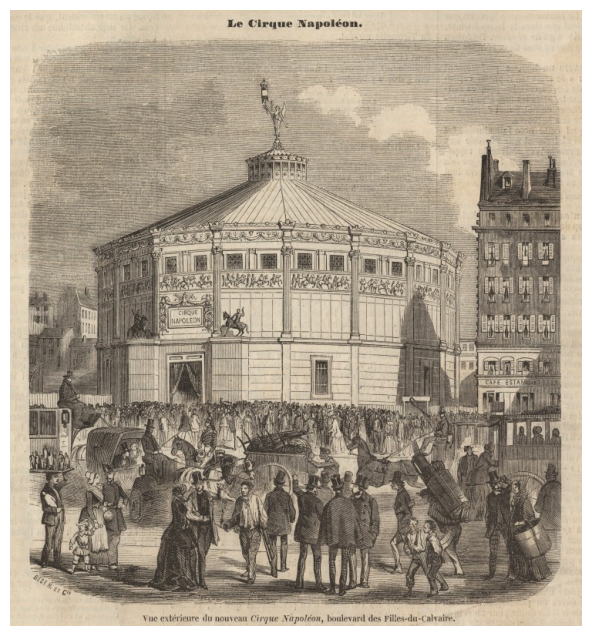

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = '/home/workspace/data/GLDv2/index/image/1/3/b/13b75d49867d477d.jpg'

# 이미지 읽기 및 시각화
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()

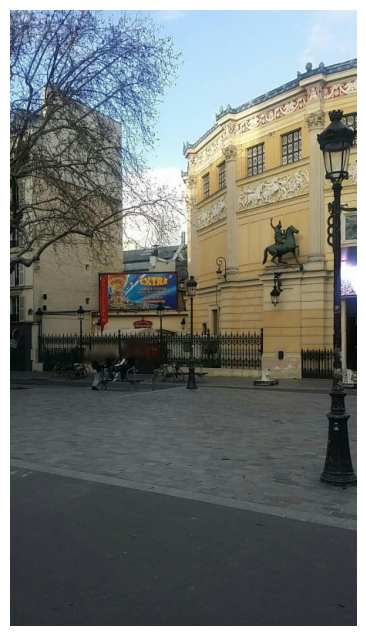

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 이미지 파일 경로
image_path = '/home/workspace/data/GLDv2/test/image/9/2/6/9265ec6df51a366e.jpg'

# 이미지 읽기 및 시각화
img = mpimg.imread(image_path)
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()